# Assuming 'optimizer' is your optimizer
   scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

    step_size: Number of epochs after which to adjust the learning rate.
    gamma: Factor by which to multiply the learning rate. In this example, it's reduced by a factor of 10 every 10 epochs.

for epoch in range(num_epochs):
       train_loss = train_batch(model_n, train_loader, optimizer, criterion, device)
       val_loss = validate_batch(model_n, val_loader, criterion, device)
       print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
       
       # Update the learning rate
       scheduler.step()

In [1]:
import clearml
clearml.browser_login()
from clearml import Task


WARNING ⚠️ no model scale passed. Assuming scale='n'.

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1     10272  ultralytics.nn.modules.conv.ConvNextBlockV2  [32, 32]                      
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     73856  ultralytics.nn.modules.conv.ConvNextBlockV2  [64, 64]                      
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    278784  ultralytics.nn.modules.conv.ConvNextBlockV2  [128, 128]                    
  7                  -1  1    295

/home/administrador/Documents/S-YOLO/cfg/models/v8/yolov8-CNVCSPPF.yaml


YOLOv8-CNVCSPPF summary: 224 layers, 3548793 parameters, 3548777 gradients, 9.2 GFLOPs

New https://pypi.org/project/ultralytics/8.3.39 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.183 🚀 Python-3.10.14 torch-2.4.1+cpu CPU (Intel Core(TM) i7-4790 3.60GHz)
engine/trainer: task=detect, mode=train, model=/home/administrador/Documents/S-YOLO/cfg/models/v8/yolov8-CNVCSPPF.yaml, data=/home/administrador/Documents/S-YOLO/cfg/datasets/custom_data9.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, nwdloss=False, max_det=300, half=False, dnn=Fals

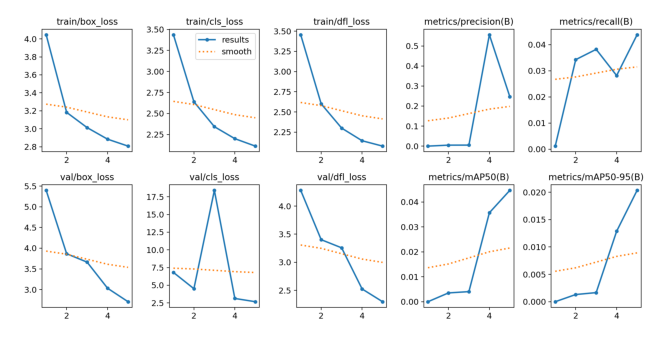

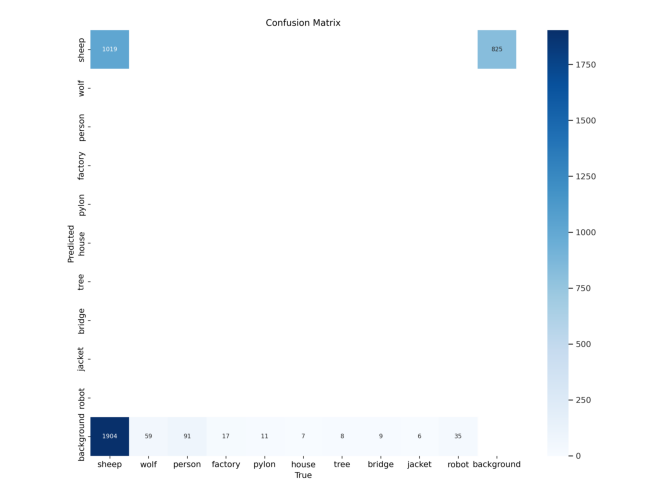

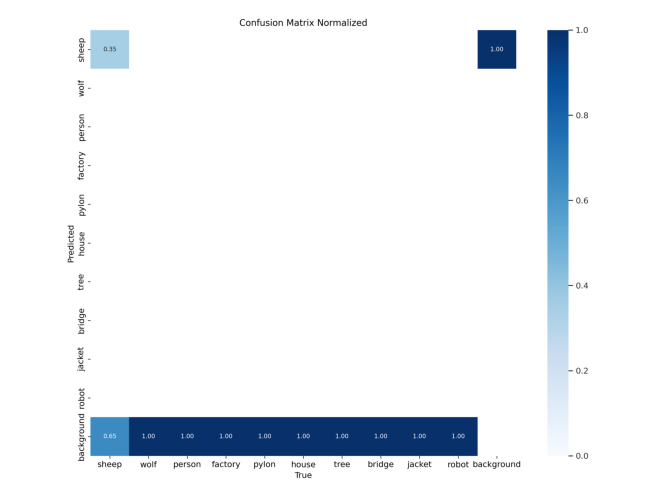

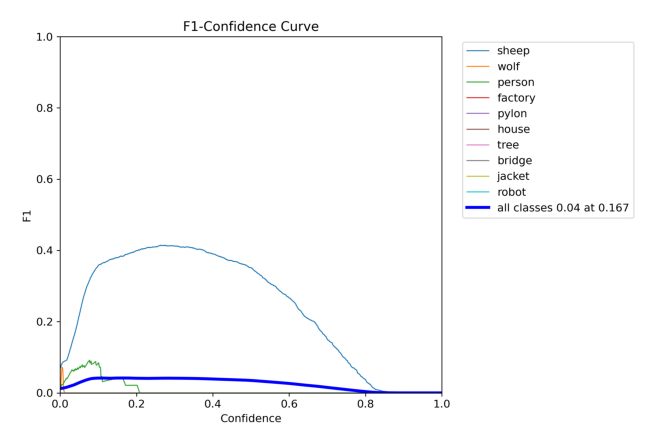

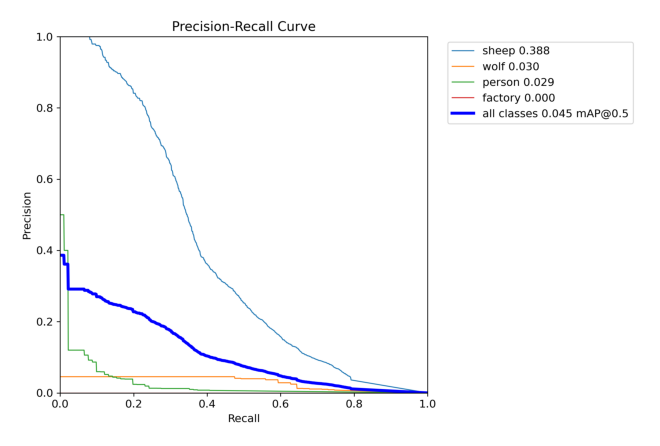

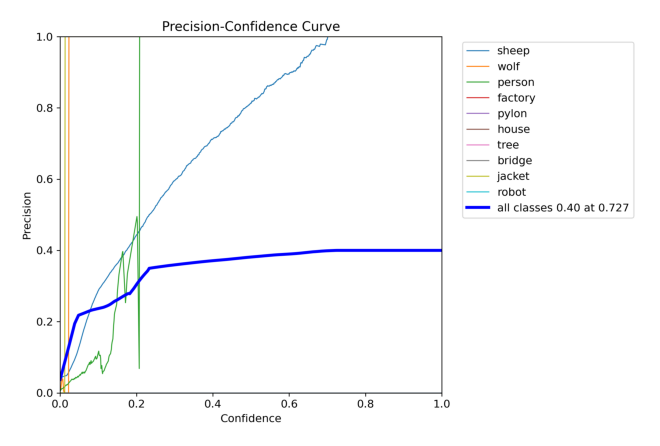

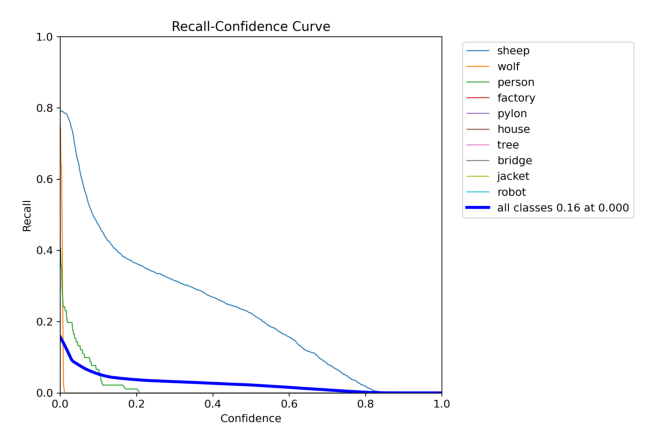

In [9]:

from ultralytics import YOLO
model_path = "/home/administrador/Documents/S-YOLO/cfg/models/v8/"
data_path = "/home/administrador/Documents/S-YOLO/cfg/datasets/"  

models = f"{model_path}yolov8.yaml"
models = f"{model_path}yolov8-CNVCSPPF.yaml"
print(models)

# Load a model
model = YOLO(models)  # build a new model from YAML

# Train the model
results = model.train(data=f"{data_path}custom_data9.yaml", epochs=5, imgsz=640)

Ultralytics YOLOv8.0.183 🚀 Python-3.10.14 torch-2.4.1+cpu CPU (Intel Core(TM) i7-4790 3.60GHz)
YOLOv8-CNV summary (fused): 164 layers, 3198126 parameters, 0 gradients, 8.8 GFLOPs
val: Scanning /home/administrador/Documents/S-YOLO/datas/labels/val.cache... 263 images, 0 backgrounds, 0 corrupt: 100%|██████████| 263/263 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:30<00:00,  1.79s/it]
                   all        263       3166       0.65     0.0343     0.0372     0.0123
                 sheep        263       2923       0.48      0.332      0.328      0.107
                  wolf        263         59          1          0    0.00699    0.00206
                person        263         91     0.0171      0.011     0.0216    0.00627
               factory        263         17          1          0          0          0
                 pylon        263         11          0          0          0    

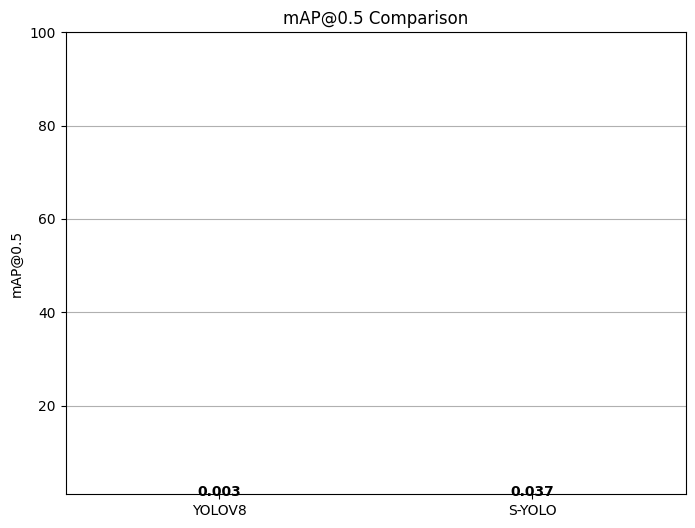

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt 

model_path = "/home/administrador/Documents/ultralytics-main/ultralytics/cfg/models/v8/"
model_path1 = "./runs/detect/train/weights/"
model_path2 = "../runs/detect/train/weights/"
# Load a model
model1 = YOLO(f"{model_path1}last.pt")  # load a custom model
# Load the second model
model2 = YOLO(f"{model_path2}last.pt")

# Validate the model
#metrics_yolov8n = model1.val(data=f"{data_path}custom_data.yaml")  # no arguments needed, dataset and settings remembered
#metrics_Syolo = model2.val(data=f"{data_path}custom_data.yaml") 

metrics_yolov8n = model1.val()  # no arguments needed, dataset and settings remembered
metrics_Syolo = model2.val() 



# Get the mAP@0.5 from the results objects
map50_model1 = metrics_Syolo.results_dict['metrics/mAP50(B)']
map50_model2 = metrics_yolov8n.results_dict['metrics/mAP50(B)']


map50_model2 = metrics_yolov8n.box.map50  # map50(B)
map50_model1 = metrics_Syolo.box.map50  # map50(B)

# Create a bar chart for comparison
models = ['YOLOV8', 'S-YOLO']
map50_values = [map50_model1, map50_model2]

plt.figure(figsize=(8, 6))
plt.bar(models, map50_values, color=['blue', 'orange'])
plt.title('mAP@0.5 Comparison')
plt.ylabel('mAP@0.5')
plt.ylim([0, 0.1])  # Set y-axis limits to 0-1 for mAP
plt.grid(axis='y')

# Add the mAP@0.5 values as text on top of the bars
for i, v in enumerate(map50_values):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.show()

#metrics.box.map  # map50-95(B)
#metrics.box.map50  # map50(B)
#metrics.box.map75  # map75(B)
#metrics.box.maps  # a list contains map50-95(B) of each category
###

import matplotlib.pyplot as plt
import pandas as pd

# Get mAP50 values from result CSV files
def get_map50_values(results_path):
    """Extracts mAP50 values from YOLO results CSV."""
    data = pd.read_csv(results_path)
    map50_values = data['metrics/mAP50(B)'].tolist()  # Adjust column name if needed
    return map50_values

# Replace these with paths to your results.csv files
results_file_path_1 = 'runs/train/exp/results.csv'  # Model 1 results file
results_file_path_2 = 'runs/train/exp2/results.csv'  # Model 2 results file

# Get mAP50 values for both models
map50_model_1 = get_map50_values(results_file_path_1)
map50_model_2 = get_map50_values(results_file_path_2)

# Define the range of epochs (adjust as needed)
epochs = range(1, len(map50_model_1) + 1)

# Plotting the mAP50 curves
plt.plot(epochs, map50_model_1, label='Model 1')
plt.plot(epochs, map50_model_2, label='Model 2')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('mAP-50')
plt.title('Comparison of mAP-50 for Two YOLOv8 Models')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
import numpy as np

# Get predictions from both models on your validation or test data
# Assuming 'val_data.yaml' is your data configuration file
results1 = model1.predict(data='val_data.yaml', save=True)  # Get predictions from model1
results2 = model2.predict(data='val_data.yaml', save=True)  # Get predictions from model2

# Extract IoU values from the results
iou_values1 = [] 
iou_values2 = []

# Loop through the predictions to get IoU for each detected object
for result in results1:  
    for *xyxy, conf, cls in result.boxes.data:
        # Assuming 'result.boxes.xywh' gives you the bounding box coordinates
        # and 'result.boxes.conf' gives you the confidence score
        iou_values1.append(result.boxes.iou())  # Replace with how you get IoU

for result in results2:
    for *xyxy, conf, cls in result.boxes.data:
        iou_values2.append(result.boxes.iou())  # Replace with how you get IoU

# Convert to NumPy arrays for easier handling
iou_values1 = np.concatenate(iou_values1, axis=0)
iou_values2 = np.concatenate(iou_values2, axis=0)

# Create histograms or box plots to compare IoU distributions
plt.figure(figsize=(10, 6))

# Histogram
plt.hist(iou_values1, bins=20, alpha=0.5, label='Model 1')
plt.hist(iou_values2, bins=20, alpha=0.5, label='Model 2')
plt.title('IoU Distribution Comparison')
plt.xlabel('IoU')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Or, you can use box plots for a different visualization
# plt.boxplot([iou_values1, iou_values2], labels=['Model 1', 'Model 2'])
# plt.title('IoU Comparison')
# plt.ylabel('IoU')
# plt.show()